In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

# WILD WITH FATHER

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_with_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [4]:
def load_subject(subject):
    if subject == 'W8Fam':
        df_mouse = pd.read_csv(data_directory + subject + '/cells300.csv')  
    else:
        df_mouse = pd.read_csv(data_directory + subject + '/cells2500.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [5]:
# NB: Run only if file does not exist or needs to be regenerated
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}
np.save('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_with_father2500.npy', 
                                   allow_pickle=True).item()

In [7]:
# dict_results_across_mice = np.load('dict_results/dict_results_across_mice_WILD_without_father2500.npy', 
#                                    allow_pickle=True).item()

In [8]:
dict_results_across_mice.keys()

dict_keys(['W10Control', 'W14Fam', 'W27Unfam', 'W16Fam', 'W38Control', 'W25Fam', 'W26Control', 'W20Unfam', 'W15Control', 'W2Unfam', 'W31Control', 'W11Unfam', 'W5Fam', 'W23Control', 'W13Unfam', 'W18Unfam', 'W7Control', 'W40Fam', 'W29Control', 'W3Control', 'W36Fam', 'W8Fam', 'W17Control', 'W34Fam'])

In [9]:
dict_results_across_mice.keys()

dict_keys(['W10Control', 'W14Fam', 'W27Unfam', 'W16Fam', 'W38Control', 'W25Fam', 'W26Control', 'W20Unfam', 'W15Control', 'W2Unfam', 'W31Control', 'W11Unfam', 'W5Fam', 'W23Control', 'W13Unfam', 'W18Unfam', 'W7Control', 'W40Fam', 'W29Control', 'W3Control', 'W36Fam', 'W8Fam', 'W17Control', 'W34Fam'])

In [10]:
# remove unclean data
dict_results_across_mice.pop('W8Fam')
subjects.remove('W8Fam')

In [11]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [12]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Fam': ['W14Fam', 'W16Fam', 'W25Fam', 'W5Fam', 'W40Fam', 'W36Fam', 'W34Fam'],
 'Unfam': ['W27Unfam',
  'W20Unfam',
  'W2Unfam',
  'W11Unfam',
  'W13Unfam',
  'W18Unfam']}

## Calculate number of cells

In [14]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [15]:
df_control_cell_count.set_index('area').sum()

W10Control    12128
W38Control    39907
W26Control    14219
W15Control    26607
W31Control    40416
W23Control    16849
W7Control     18122
W29Control    28858
W3Control     29800
W17Control    20326
dtype: int64

In [16]:
df_fam_cell_count.set_index('area').sum()

W14Fam    26340
W16Fam    28807
W25Fam    32747
W5Fam     15205
W40Fam    18653
W36Fam    36035
W34Fam    20919
dtype: int64

In [17]:
df_unfam_cell_count.set_index('area').sum()

W27Unfam    30535
W20Unfam    17892
W2Unfam     35149
W11Unfam    29467
W13Unfam    39879
W18Unfam    29761
dtype: int64

In [18]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])
df_ttest_ncells

area pval_Control_vs_Fam  \
0       Frontal pole cerebral cortex            0.800493   
1                 Primary motor area            0.317994   
2               Secondary motor area            0.341591   
3         Primary somatosensory area            0.635184   
4    Supplemental somatosensory area            0.492843   
..                               ...                 ...   
194    Interfascicular nucleus raphe            0.554434   
195          Interpeduncular nucleus            0.747276   
196     Rostral linear nucleus raphe            0.518105   
197     Central linear nucleus raphe             0.80283   
198             Dorsal nucleus raphe             0.72486   

    pval_Control_vs_Unfam pval_Fam_vs_Unfam  
0                 0.30763          0.314441  
1                0.858661           0.63766  
2                0.341483          0.835318  
3                0.475303           0.29274  
4                0.186436          0.496859  
..                    ...               ...  
194              0.271766           0.14589  
195              0.456427          0.320072  
196              0.546471          0.320655  
197               0.29997           0.20783  
198               0.36289          0.206875  

[198 rows x 4 columns]

In [19]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [20]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

pval_Control_vs_Fam
area                                                                  
Posterior amygdalar nucleus                                0.000290289
Septofimbrial nucleus                                       0.00574974
Cortical amygdalar area                                      0.0235989
Lateral visual area                                          0.0377767
Parabigeminal nucleus                                        0.0401696
Nucleus sagulum                                              0.0431661
Intercalated amygdalar nucleus                               0.0501465
Medial amygdalar nucleus                                     0.0854566
Triangular nucleus of septum                                 0.0868503
Ammon's horn                                                 0.0926293
Main olfactory bulb                                           0.110947
Ventral premammillary nucleus                                 0.121678
Magnocellular nucleus                                          0.12423
Suprageniculate nucleus                                        0.12456
Dentate gyrus                                                  0.12844
Central lateral nucleus of the thalamus                       0.135345
Ventral part of the lateral geniculate complex                0.142863
Ventral medial nucleus of the thalamus                        0.143167
Tuberal nucleus                                               0.153703
Periventricular hypothalamic nucleus preoptic part            0.165756

In [21]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

pval_Control_vs_Unfam
area                                                
Posterior amygdalar nucleus              7.49994e-06
Medial amygdalar nucleus                 0.000958334
Cortical amygdalar area                   0.00102667
Claustrum                                 0.00239708
Piriform area                             0.00486937
Postpiriform transition area              0.00750764
Basolateral amygdalar nucleus              0.0080129
Ventral premammillary nucleus             0.00919145
Piriform-amygdalar area                    0.0150013
Intercalated amygdalar nucleus              0.017116
Endopiriform nucleus                       0.0599325
Anterior olfactory nucleus                  0.063889
Infralimbic area                           0.0680128
Dorsal premammillary nucleus               0.0729873
Tuberal nucleus                            0.0747403
Main olfactory bulb                         0.075378
Agranular insular area                     0.0869301
Olfactory tubercle                         0.0936032
Nucleus sagulum                            0.0948489
Entorhinal area                             0.094884

In [22]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

pval_Fam_vs_Unfam
area                                                                
Ammon's horn                                               0.0163953
Anterior olfactory nucleus                                 0.0217002
Agranular insular area                                     0.0301669
Substantia nigra compact part                              0.0325094
Claustrum                                                  0.0368114
Medial amygdalar nucleus                                    0.037621
Piriform area                                              0.0596124
Subiculum                                                  0.0619873
Posterior amygdalar nucleus                                0.0829385
Postpiriform transition area                               0.0865846
Anteroventral periventricular nucleus                      0.0961233
Posterior limiting nucleus of the thalamus                  0.100791
Taenia tecta                                                0.106732
Vascular organ of the lamina terminalis                     0.113234
Piriform-amygdalar area                                     0.116964
Paraventricular hypothalamic nucleus descending...          0.122644
Dorsal peduncular area                                      0.125497
Parastrial nucleus                                          0.126146
Basomedial amygdalar nucleus                                0.136093
Endopiriform nucleus                                        0.136176

## Calculate corr matrices on number of cells

In [23]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

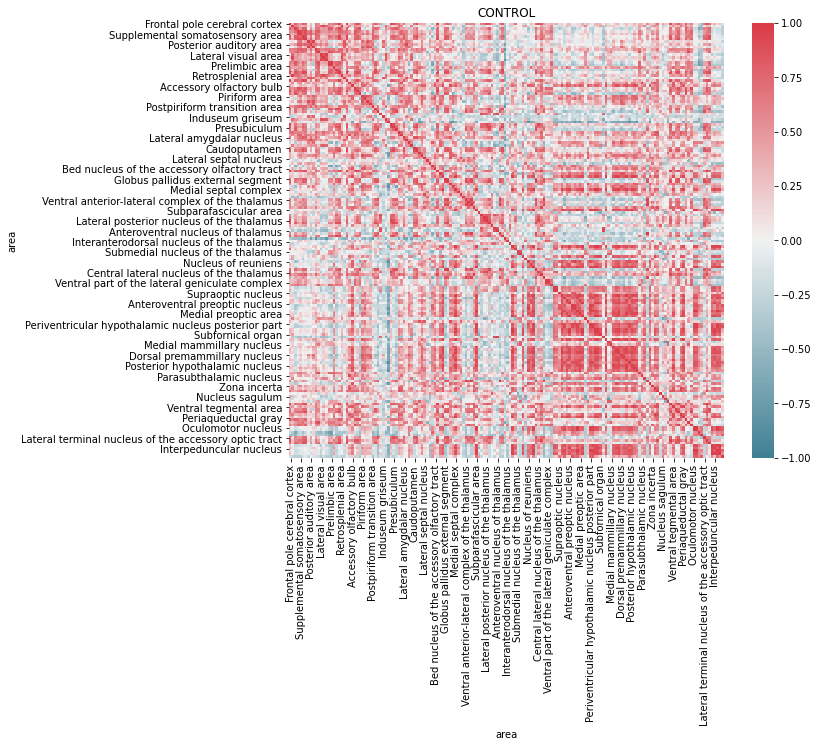

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

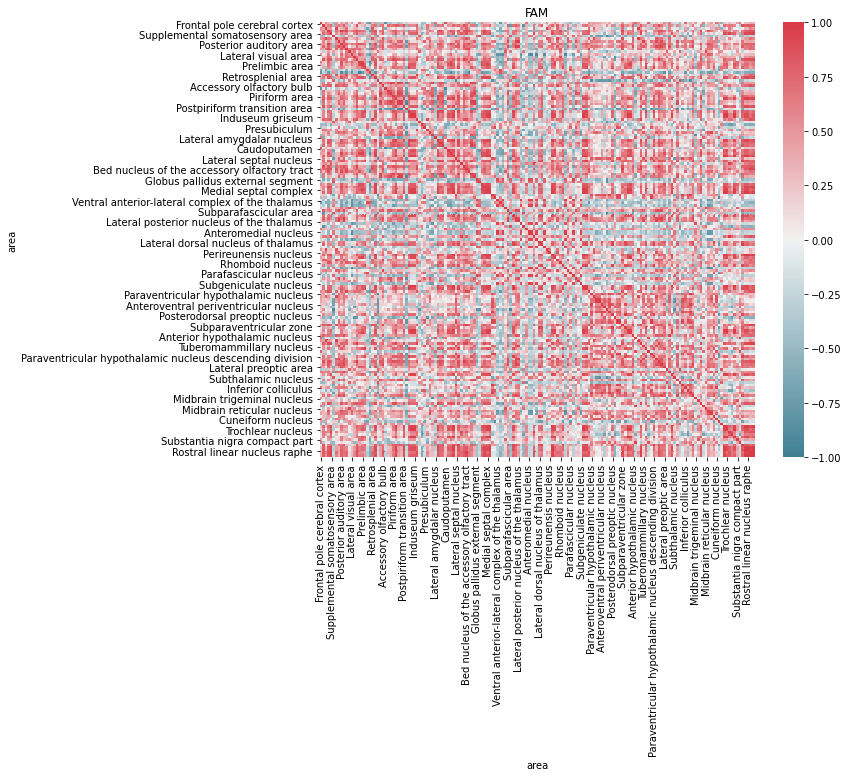

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

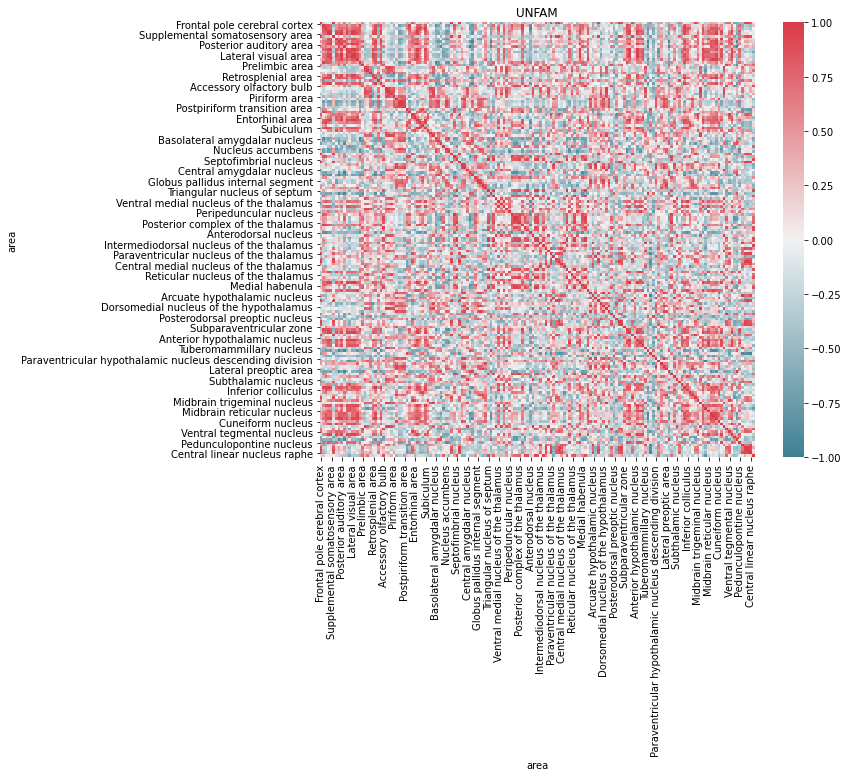

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

In [27]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='relative_density')
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [28]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

pval_Control_vs_Fam
area                                                                  
Posterior amygdalar nucleus                                6.67339e-05
Septofimbrial nucleus                                       0.00370505
Cortical amygdalar area                                      0.0181365
Medial amygdalar nucleus                                     0.0296636
Central amygdalar nucleus                                    0.0354569
Dentate gyrus                                                0.0410521
Paraventricular hypothalamic nucleus descending...           0.0567476
Triangular nucleus of septum                                 0.0667684
Intercalated amygdalar nucleus                               0.0763362
Claustrum                                                    0.0785113
Main olfactory bulb                                          0.0788302
Accessory olfactory bulb                                     0.0964652
Nucleus sagulum                                              0.0998744
Lateral visual area                                           0.105084
Ventral part of the lateral geniculate complex                0.109351
Ventral premammillary nucleus                                 0.119273
Ammon's horn                                                  0.125703
Subiculum                                                     0.134703
Lateral posterior nucleus of the thalamus                     0.135092
Retrosplenial area                                            0.152871

In [29]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

pval_Control_vs_Unfam
area                                                             
Posterior amygdalar nucleus                           0.000687454
Claustrum                                              0.00270762
Cortical amygdalar area                                0.00280396
Medial amygdalar nucleus                               0.00649567
Piriform area                                          0.00703503
Postpiriform transition area                            0.0221521
Piriform-amygdalar area                                 0.0331102
Ventral premammillary nucleus                            0.050974
Anterior olfactory nucleus                              0.0579301
Agranular insular area                                  0.0599408
Basolateral amygdalar nucleus                           0.0680567
Supplemental somatosensory area                         0.0753818
Primary somatosensory area                               0.076192
Mediodorsal nucleus of thalamus                         0.0850563
Anterodorsal nucleus                                    0.0902188
Secondary motor area                                    0.0911817
Midbrain reticular nucleus retrorubral area             0.0970923
Infralimbic area                                         0.102183
Substantia nigra compact part                            0.105154
Endopiriform nucleus                                     0.105589

## Histograms with father

<AxesSubplot:xlabel='area', ylabel='number of cells'>

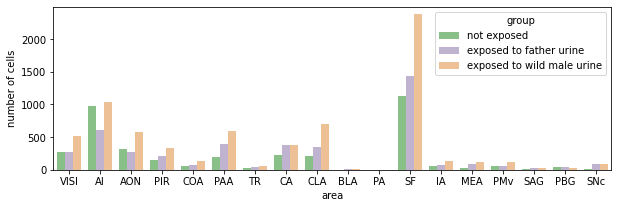

In [30]:
# stack1
areas_ttest = np.unique(np.hstack([
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Control_vs_Fam']<0.05]['area'].values,
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Control_vs_Unfam']<0.05]['area'].values,
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values]))

areas_ttest_acronyms = [volumes[volumes['safe_name']==area]['acronym'].values[0] for area in areas_ttest]
areas_ttest_acronyms = [area for area in volumes['acronym'].values if area in areas_ttest_acronyms]

control = pd.DataFrame(columns=['area', 'number of cells', 'group'])
fam = pd.DataFrame(columns=['area', 'number of cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'number of cells', 'group'])
control['area'] = areas_ttest_acronyms
control['group'] = ['not exposed' for area in areas_ttest]
control['number of cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]

fam['area'] = areas_ttest_acronyms
fam['group'] = ['exposed to father urine' for area in areas_ttest]
fam['number of cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]

unfam['area'] = areas_ttest_acronyms
unfam['group'] = ['exposed to wild male urine' for area in areas_ttest]
unfam['number of cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]
with_father = control.append(fam).append(unfam)

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,3), sharey=True)
sns.barplot(
    data=with_father,
    x="area", y="number of cells", hue="group", palette="Accent", ax=ax)

<AxesSubplot:xlabel='area', ylabel='energy'>

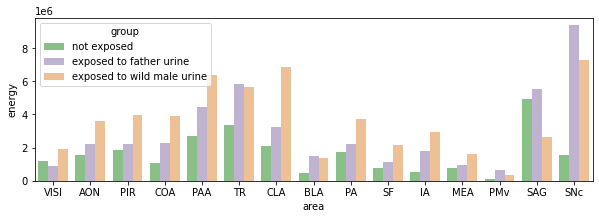

In [31]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

# stack1
areas_ttest = np.unique(np.hstack([
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Control_vs_Fam']<0.05]['area'].values,
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Control_vs_Unfam']<0.05]['area'].values,
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Fam_vs_Unfam']<0.05]['area'].values]))

areas_ttest_acronyms = [volumes[volumes['safe_name']==area]['acronym'].values[0] for area in areas_ttest]
areas_ttest_acronyms = [area for area in volumes['acronym'].values if area in areas_ttest_acronyms]

control = pd.DataFrame(columns=['area', 'energy', 'group'])
fam = pd.DataFrame(columns=['area', 'energy', 'group'])
unfam = pd.DataFrame(columns=['area', 'energy', 'group'])
control['area'] = areas_ttest_acronyms
control['group'] = ['not exposed' for area in areas_ttest]
control['energy'] = [df_control_energy.set_index('area').loc[area].mean() for area in areas_ttest]

fam['area'] = areas_ttest_acronyms
fam['group'] = ['exposed to father urine' for area in areas_ttest]
fam['energy'] = [df_fam_energy.set_index('area').loc[area].mean() for area in areas_ttest]

unfam['area'] = areas_ttest_acronyms
unfam['group'] = ['exposed to wild male urine' for area in areas_ttest]
unfam['energy'] = [df_unfam_energy.set_index('area').loc[area].mean() for area in areas_ttest]
with_father = control.append(fam).append(unfam)

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,3), sharey=True)
sns.barplot(
    data=with_father,
    x="area", y="energy", hue="group", palette="Accent", ax=ax)

# WILD without father

In [32]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'WILD_without_father'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]

In [33]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [35]:
# NB: Run only if file does not exist or needs to be regenerated
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
                                                                          vol=volumes, 
                                                                          level=8) for subject in subjects}
np.save('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', allow_pickle=True).item()

In [37]:
# remove unclean data
dict_results_across_mice.pop('W12Fam')
subjects.remove('W12Fam')

In [38]:
dict_results_across_mice.keys()

dict_keys(['W10Control', 'W6Unfam', 'W38Control', 'W26Control', 'W9Fam', 'W15Control', 'W31Control', 'W30Fam', 'W24Unfam', 'W23Control', 'W7Control', 'W35Unfam', 'W4Unfam', 'W32Fam', 'W1Fam', 'W29Control', 'W3Control', 'W28Unfam', 'W39Unfam', 'W22Fam', 'W17Control', 'W37Unfam'])

In [39]:
dict_results_across_mice['W10Control'].keys()


Index(['area', 'n_cells', 'energy', 'density', 'relative_density'], dtype='object')

In [40]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [41]:
experimental_groups

{'Control': ['W10Control',
  'W38Control',
  'W26Control',
  'W15Control',
  'W31Control',
  'W23Control',
  'W7Control',
  'W29Control',
  'W3Control',
  'W17Control'],
 'Fam': ['W9Fam', 'W30Fam', 'W32Fam', 'W1Fam', 'W22Fam'],
 'Unfam': ['W6Unfam',
  'W24Unfam',
  'W35Unfam',
  'W4Unfam',
  'W28Unfam',
  'W39Unfam',
  'W37Unfam']}

# Calculate number of cells

In [42]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [43]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [44]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [45]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

pval_Control_vs_Fam
area                                                                  
Primary motor area                                         0.000136941
Tuberal nucleus                                             0.00278097
Main olfactory bulb                                         0.00603224
Cortical amygdalar area                                     0.00612165
Posterior amygdalar nucleus                                 0.00617066
Piriform-amygdalar area                                      0.0078485
Medial amygdalar nucleus                                     0.0114026
Postpiriform transition area                                 0.0143509
Entorhinal area                                              0.0144108
Basolateral amygdalar nucleus                                0.0237606
Parasubiculum                                                0.0238138
Intercalated amygdalar nucleus                               0.0301419
Primary somatosensory area                                   0.0402296
Piriform area                                                 0.043687
Anterior olfactory nucleus                                   0.0455978
Septohippocampal nucleus                                     0.0518589
Triangular nucleus of septum                                 0.0543695
Claustrum                                                    0.0602936
Periventricular hypothalamic nucleus posterior ...           0.0692286
Accessory olfactory bulb                                     0.0819955

In [46]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

pval_Control_vs_Unfam
area                                               
Postpiriform transition area               0.002876
Piriform-amygdalar area                  0.00529751
Main olfactory bulb                      0.00884306
Piriform area                             0.0132735
Cortical amygdalar area                   0.0160812
Secondary motor area                      0.0171462
Agranular insular area                     0.027403
Basolateral amygdalar nucleus             0.0303681
Primary motor area                        0.0321418
Olfactory tubercle                         0.036664
Perirhinal area                           0.0471052
Claustrum                                 0.0527041
Perireunensis nucleus                     0.0542127
Primary somatosensory area                0.0544867
Entorhinal area                           0.0547762
Accessory olfactory bulb                  0.0596107
Prelimbic area                            0.0601187
Nucleus sagulum                           0.0630078
Anterior cingulate area                    0.072631
Subgeniculate nucleus                     0.0837495

In [47]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

pval_Fam_vs_Unfam
area                                                                
Dorsomedial nucleus of the hypothalamus                    0.0165989
Ventral tegmental nucleus                                  0.0267282
Posterior limiting nucleus of the thalamus                 0.0297425
Intergeniculate leaflet of the lateral genicula...         0.0394482
Tuberal nucleus                                            0.0407472
Dorsal nucleus raphe                                       0.0421134
Medial amygdalar nucleus                                   0.0492919
Subgeniculate nucleus                                      0.0683345
Lateral preoptic area                                      0.0760859
Dentate gyrus                                              0.0762945
Induseum griseum                                           0.0768851
Edinger-Westphal nucleus                                   0.0794782
Periventricular hypothalamic nucleus posterior ...         0.0797077
Ventral part of the lateral geniculate complex             0.0848838
Posterior amygdalar nucleus                                 0.086261
Anterior tegmental nucleus                                 0.0924359
Intercalated amygdalar nucleus                              0.101897
Dorsal premammillary nucleus                                0.103352
Ventral tegmental area                                      0.112912
Septohippocampal nucleus                                    0.113348

# Calculate corr matrices on number of cells

In [48]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

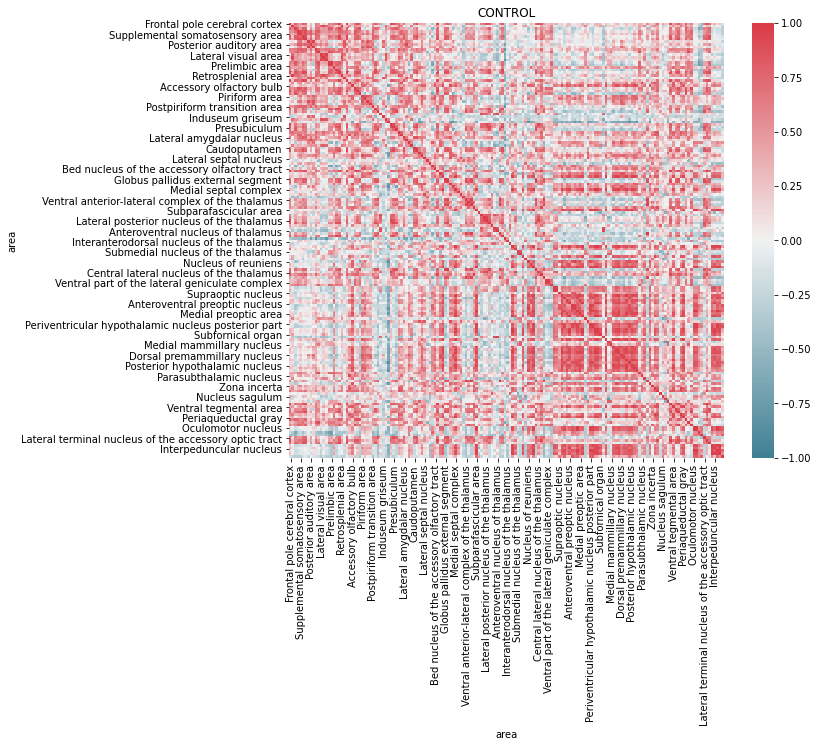

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

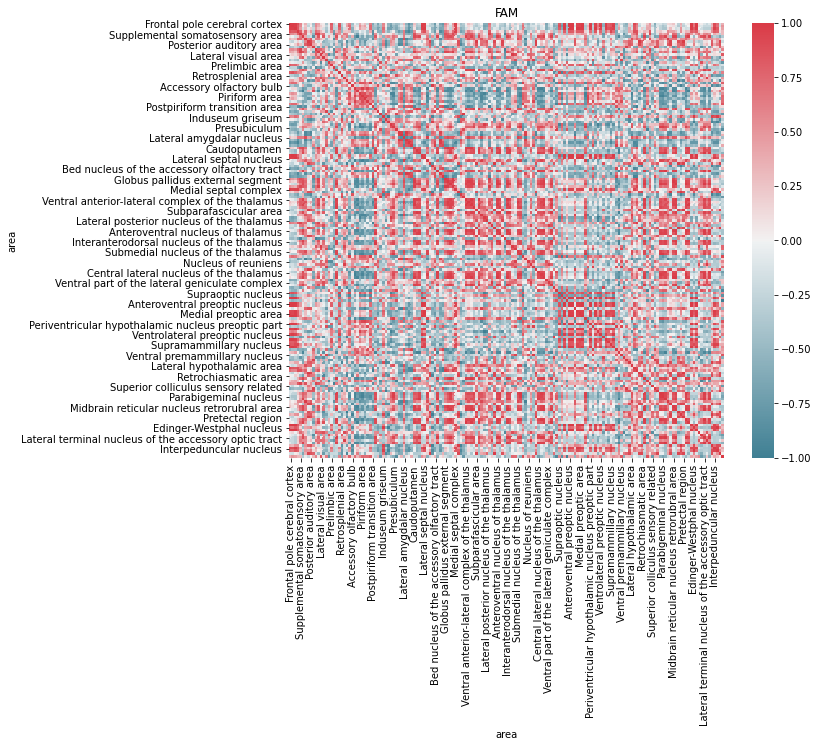

In [50]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

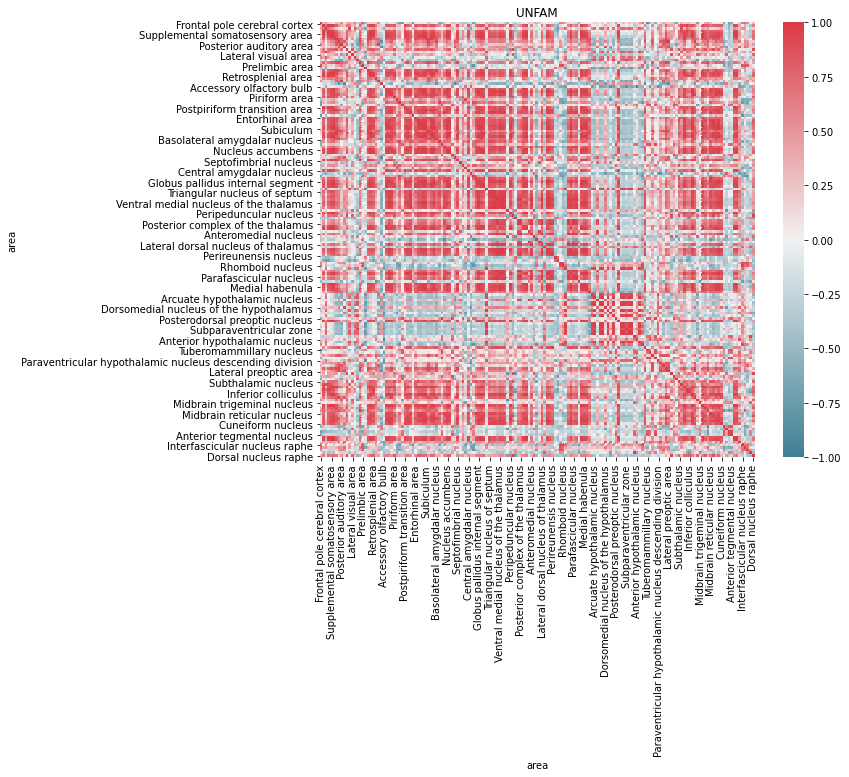

In [51]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

In [52]:
dict_results_across_mice['W10Control']

area  n_cells         energy    density  \
0       Frontal pole cerebral cortex        8  109399.515947  14.664814   
1                 Primary motor area       59   82601.946770   9.965208   
2               Secondary motor area      121  138500.040750  17.695219   
3         Primary somatosensory area      169  105653.441695  13.502742   
4    Supplemental somatosensory area       44   70555.619944   9.324905   
..                               ...      ...            ...        ...   
194    Interfascicular nucleus raphe        0       0.000000   0.000000   
195          Interpeduncular nucleus        3   64960.745032   7.796849   
196     Rostral linear nucleus raphe        0       0.000000   0.000000   
197     Central linear nucleus raphe        0       0.000000   0.000000   
198             Dorsal nucleus raphe        0       0.000000   0.000000   

     relative_density  
0            0.618239  
1            0.420113  
2            0.745995  
3            0.569248  
4            0.393119  
..                ...  
194          0.000000  
195          0.328699  
196          0.000000  
197          0.000000  
198          0.000000  

[198 rows x 5 columns]

## Histograms WITHOUT FATHER

<AxesSubplot:xlabel='area', ylabel='number of cells'>

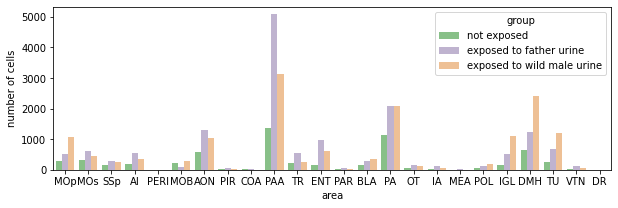

In [53]:
# stack1
areas_ttest = np.unique(np.hstack([
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Control_vs_Fam']<0.05]['area'].values,
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Control_vs_Unfam']<0.05]['area'].values,
    df_ttest_not_null_ncells[df_ttest_not_null_ncells['pval_Fam_vs_Unfam']<0.05]['area'].values]))

areas_ttest_acronyms = [volumes[volumes['safe_name']==area]['acronym'].values[0] for area in areas_ttest]
areas_ttest_acronyms = [area for area in volumes['acronym'].values if area in areas_ttest_acronyms]

control = pd.DataFrame(columns=['area', 'number of cells', 'group'])
fam = pd.DataFrame(columns=['area', 'number of cells', 'group'])
unfam = pd.DataFrame(columns=['area', 'number of cells', 'group'])
control['area'] = areas_ttest_acronyms
control['group'] = ['not exposed' for area in areas_ttest]
control['number of cells'] = [df_control_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]

fam['area'] = areas_ttest_acronyms
fam['group'] = ['exposed to father urine' for area in areas_ttest]
fam['number of cells'] = [df_fam_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]

unfam['area'] = areas_ttest_acronyms
unfam['group'] = ['exposed to wild male urine' for area in areas_ttest]
unfam['number of cells'] = [df_unfam_cell_count.set_index('area').loc[area].mean() for area in areas_ttest]
with_father = control.append(fam).append(unfam)

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,3), sharey=True)
sns.barplot(
    data=with_father,
    x="area", y="number of cells", hue="group", palette="Accent", ax=ax)

<AxesSubplot:xlabel='area', ylabel='energy'>

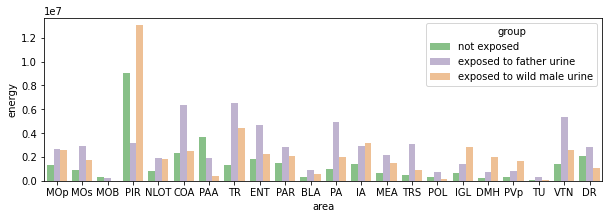

In [54]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

# stack1
areas_ttest = np.unique(np.hstack([
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Control_vs_Fam']<0.05]['area'].values,
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Control_vs_Unfam']<0.05]['area'].values,
    df_ttest_not_null_energy[df_ttest_not_null_energy['pval_Fam_vs_Unfam']<0.05]['area'].values]))

areas_ttest_acronyms = [volumes[volumes['safe_name']==area]['acronym'].values[0] for area in areas_ttest]
areas_ttest_acronyms = [area for area in volumes['acronym'].values if area in areas_ttest_acronyms]

control = pd.DataFrame(columns=['area', 'energy', 'group'])
fam = pd.DataFrame(columns=['area', 'energy', 'group'])
unfam = pd.DataFrame(columns=['area', 'energy', 'group'])
control['area'] = areas_ttest_acronyms
control['group'] = ['not exposed' for area in areas_ttest]
control['energy'] = [df_control_energy.set_index('area').loc[area].mean() for area in areas_ttest]

fam['area'] = areas_ttest_acronyms
fam['group'] = ['exposed to father urine' for area in areas_ttest]
fam['energy'] = [df_fam_energy.set_index('area').loc[area].mean() for area in areas_ttest]

unfam['area'] = areas_ttest_acronyms
unfam['group'] = ['exposed to wild male urine' for area in areas_ttest]
unfam['energy'] = [df_unfam_energy.set_index('area').loc[area].mean() for area in areas_ttest]
with_father = control.append(fam).append(unfam)

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,3), sharey=True)
sns.barplot(
    data=with_father,
    x="area", y="energy", hue="group", palette="Accent", ax=ax)